In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import SensitivityAtSpecificity
import matplotlib.pyplot as plt

In [2]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

train_dir = r'/kaggle/input/chest-xray-images-for-classification-pneumonia/train'
val_dir = r'/kaggle/input/chest-xray-images-for-classification-pneumonia/validation'
test_dir = r'/kaggle/input/chest-xray-images-for-classification-pneumonia/test'

In [4]:
def create_model(batch_size):
    
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range = 5, 
                                       horizontal_flip = True)
    
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary')
    
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode='binary')

    with tf.device('/gpu:0'):
        model = tf.keras.models.Sequential()
        model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(32, (3, 3), activation = 'relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(32, (3, 3), activation = 'relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(32, (3, 3), activation = 'relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(tf.keras.layers.Flatten())
        model.add(Dense(512, activation = 'relu'))
        model.add(Dense(1, activation = 'sigmoid'))

        model.compile(loss = 'binary_crossentropy',
                      optimizer = tf.keras.optimizers.RMSprop(lr = 1e-4),
                      metrics = [SensitivityAtSpecificity(0.9)])

    return model, train_generator, val_generator

In [5]:
model_1, train_generator_1, val_generator_1 = create_model(8)
model_2, train_generator_2, val_generator_2 = create_model(16)
model_3, train_generator_3, val_generator_3 = create_model(32)

Found 3513 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 3513 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 3513 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [6]:
%%time
history_1 = model_1.fit_generator(
    train_generator_1,
    steps_per_epoch = None, # = 3513 / 8
    verbose = 1,
    epochs = 10,
    validation_data = val_generator_1,
    validation_steps = None # = 1172 / 8
)

Train for 440 steps, validate for 147 steps
Epoch 1/10
440/440 [==============================] - 78s 178ms/step - loss: 0.4289 - sensitivity_at_specificity: 0.5234 - val_loss: 0.2610 - val_sensitivity_at_specificity: 0.8515
Epoch 2/10
440/440 [==============================] - 68s 154ms/step - loss: 0.2463 - sensitivity_at_specificity: 0.8506 - val_loss: 0.2344 - val_sensitivity_at_specificity: 0.8865
Epoch 3/10
440/440 [==============================] - 67s 152ms/step - loss: 0.2118 - sensitivity_at_specificity: 0.9111 - val_loss: 0.2057 - val_sensitivity_at_specificity: 0.8959
Epoch 4/10
440/440 [==============================] - 67s 151ms/step - loss: 0.1948 - sensitivity_at_specificity: 0.9247 - val_loss: 0.2078 - val_sensitivity_at_specificity: 0.9135
Epoch 5/10
440/440 [==============================] - 66s 151ms/step - loss: 0.1784 - sensitivity_at_specificity: 0.9317 - val_loss: 0.2240 - val_sensitivity_at_specificity: 0.9099
Epoch 6/10
440/440 [==============================]

In [7]:
%%time
history_2 = model_2.fit_generator(
    train_generator_2,
    steps_per_epoch = None, # = 3513 / 16
    verbose = 1,
    epochs = 10,
    validation_data = val_generator_2,
    validation_steps = None # = 1172 / 16
)

Train for 220 steps, validate for 74 steps
Epoch 1/10
220/220 [==============================] - 67s 305ms/step - loss: 0.4747 - sensitivity_at_specificity_1: 0.5043 - val_loss: 0.3100 - val_sensitivity_at_specificity_1: 0.8585
Epoch 2/10
220/220 [==============================] - 67s 307ms/step - loss: 0.2861 - sensitivity_at_specificity_1: 0.8214 - val_loss: 0.2272 - val_sensitivity_at_specificity_1: 0.8901
Epoch 3/10
220/220 [==============================] - 68s 307ms/step - loss: 0.2304 - sensitivity_at_specificity_1: 0.8877 - val_loss: 0.2060 - val_sensitivity_at_specificity_1: 0.8994
Epoch 4/10
220/220 [==============================] - 67s 304ms/step - loss: 0.2070 - sensitivity_at_specificity_1: 0.9080 - val_loss: 0.2077 - val_sensitivity_at_specificity_1: 0.9053
Epoch 5/10
220/220 [==============================] - 66s 300ms/step - loss: 0.1905 - sensitivity_at_specificity_1: 0.9224 - val_loss: 0.2040 - val_sensitivity_at_specificity_1: 0.9088
Epoch 6/10
220/220 [============

In [8]:
%%time
history_3 = model_3.fit_generator(
    train_generator_3,
    steps_per_epoch = None, # = 3513 / 32
    verbose = 1,
    epochs = 10,
    validation_data = val_generator_3,
    validation_steps = None # = 1172 / 32
)

Train for 110 steps, validate for 37 steps
Epoch 1/10
110/110 [==============================] - 67s 608ms/step - loss: 0.5160 - sensitivity_at_specificity_2: 0.4021 - val_loss: 0.3979 - val_sensitivity_at_specificity_2: 0.7754
Epoch 2/10
110/110 [==============================] - 65s 593ms/step - loss: 0.3447 - sensitivity_at_specificity_2: 0.7582 - val_loss: 0.3240 - val_sensitivity_at_specificity_2: 0.8643
Epoch 3/10
110/110 [==============================] - 65s 594ms/step - loss: 0.2717 - sensitivity_at_specificity_2: 0.8393 - val_loss: 0.2523 - val_sensitivity_at_specificity_2: 0.8842
Epoch 4/10
110/110 [==============================] - 65s 589ms/step - loss: 0.2483 - sensitivity_at_specificity_2: 0.8666 - val_loss: 0.2406 - val_sensitivity_at_specificity_2: 0.8947
Epoch 5/10
110/110 [==============================] - 65s 593ms/step - loss: 0.2235 - sensitivity_at_specificity_2: 0.9002 - val_loss: 0.2232 - val_sensitivity_at_specificity_2: 0.9018
Epoch 6/10
110/110 [============

In [9]:
acc_1 = history_1.history['sensitivity_at_specificity']
val_acc_1 = history_1.history['val_sensitivity_at_specificity']
loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

acc_2 = history_2.history['sensitivity_at_specificity_1']
val_acc_2 = history_2.history['val_sensitivity_at_specificity_1']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

acc_3 = history_3.history['sensitivity_at_specificity_2']
val_acc_3 = history_3.history['val_sensitivity_at_specificity_2']
loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs = range(len(acc_1))

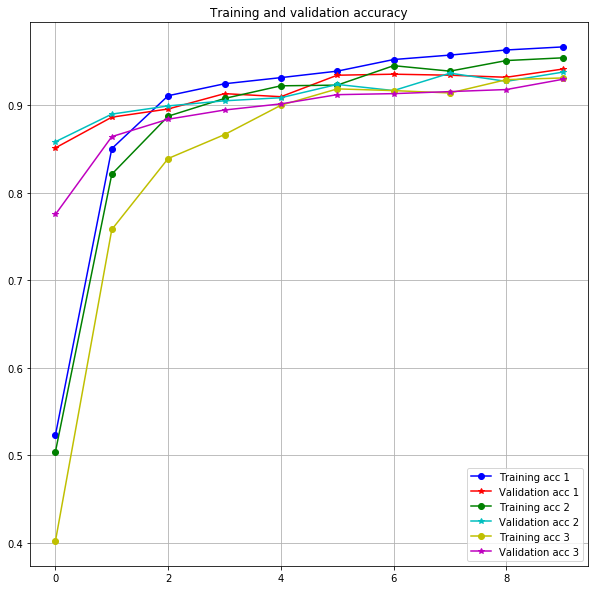

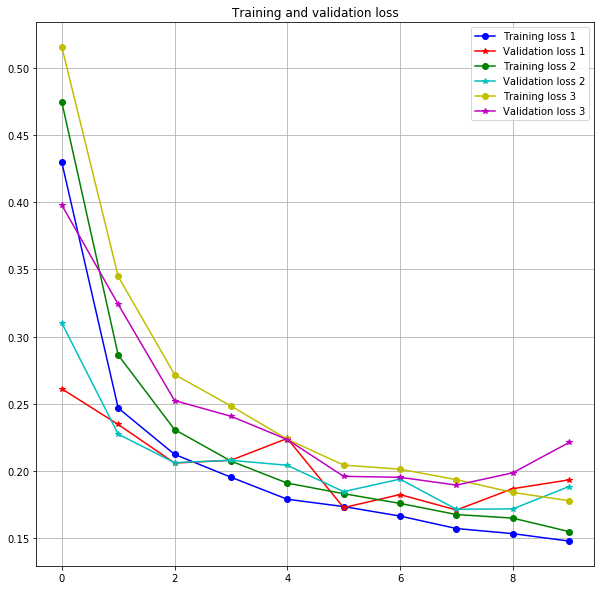

In [10]:
plt.figure(figsize=(10,10))
plt.plot(epochs, acc_1, 'bo-', label='Training acc 1')
plt.plot(epochs, val_acc_1, 'r*-', label='Validation acc 1')
plt.plot(epochs, acc_2, 'go-', label='Training acc 2')
plt.plot(epochs, val_acc_2, 'c*-', label='Validation acc 2')
plt.plot(epochs, acc_3, 'yo-', label='Training acc 3')
plt.plot(epochs, val_acc_3, 'm*-', label='Validation acc 3')
plt.title('Training and validation accuracy')
plt.grid()
plt.legend()

plt.figure(figsize=(10,10))
plt.plot(epochs, loss_1, 'bo-', label='Training loss 1')
plt.plot(epochs, val_loss_1, 'r*-', label='Validation loss 1')
plt.plot(epochs, loss_2, 'go-', label='Training loss 2')
plt.plot(epochs, val_loss_2, 'c*-', label='Validation loss 2')
plt.plot(epochs, loss_3, 'yo-', label='Training loss 3')
plt.plot(epochs, val_loss_3, 'm*-', label='Validation loss 3')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()